<a href="https://colab.research.google.com/github/Goderr/selfSupervised-SAM/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-xgu8p_hi
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-xgu8p_hi
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=5f661cc1560ae000d185bc23852ed8b625889997f0b6674a39a56353cdfccfe0
  Stored in directory: /tmp/pip-ephem-wheel-cache-k9gmo1rc/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [3]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

--2025-02-16 19:53:19--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.238.113, 13.35.238.71, 13.35.238.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.238.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   252MB/s    in 1.4s    

2025-02-16 19:53:21 (252 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [4]:
!pip install torch torchvision numpy opencv-python albumentations segment-anything monai timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
!unzip "/content/drive/MyDrive/archive (1).zip"

Archive:  /content/drive/MyDrive/archive (1).zip
  inflating: Kvasir-SEG/Kvasir-SEG/1911.07069.pdf  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0qkwl35piu0993l0dewei2.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0qoxqj9q6s0835b43399p4.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0qx73cjw570799j4n5cjze.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0roawvklrq0799vmjorwfv.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0rx1idathl0835detmsp84.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0s2a9ekvms080138tjjpxr.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0s690hkp960855tjuaqvv0.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0sr5ghl0nd08789uzf1raf.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0sxqiclckk08551ycbwhno.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0t4oil7vzk099370nun5h9.jpg  
  inflating: Kvasir-SEG/Kvasir-SEG/annotated_images/cju0tl3

In [6]:
import os
import cv2
import torch
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader


In [8]:

# Dataset path
DATASET_PATH = "/content/Kvasir-SEG/Kvasir-SEG"

# Define augmentation and transformations
transform = A.Compose([
    A.Resize(244, 244),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

class KvasirDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform=None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.img_names = sorted(os.listdir(img_dir))
        self.mask_names = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Binary mask (0 or 255)
        mask = (mask > 0).astype(np.float32)  # Convert to 0 or 1

        if self.transform:
            transformed = self.transform(image=image, mask=mask)
            image, mask = transformed["image"], transformed["mask"]

        return image, mask.unsqueeze(0)  # Add channel dimension

# Initialize dataset and dataloader
train_dataset = KvasirDataset(f"{DATASET_PATH}/images", f"{DATASET_PATH}/masks", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/10, Loss: 11824.6254
Epoch 2/10, Loss: 12.4225
Epoch 3/10, Loss: 8.9546
Epoch 4/10, Loss: 8.2243
Epoch 5/10, Loss: 7.8935
Epoch 6/10, Loss: 7.5159
Epoch 7/10, Loss: 7.3276
Epoch 8/10, Loss: 7.1250
Epoch 9/10, Loss: 7.0050
Epoch 10/10, Loss: 6.9066


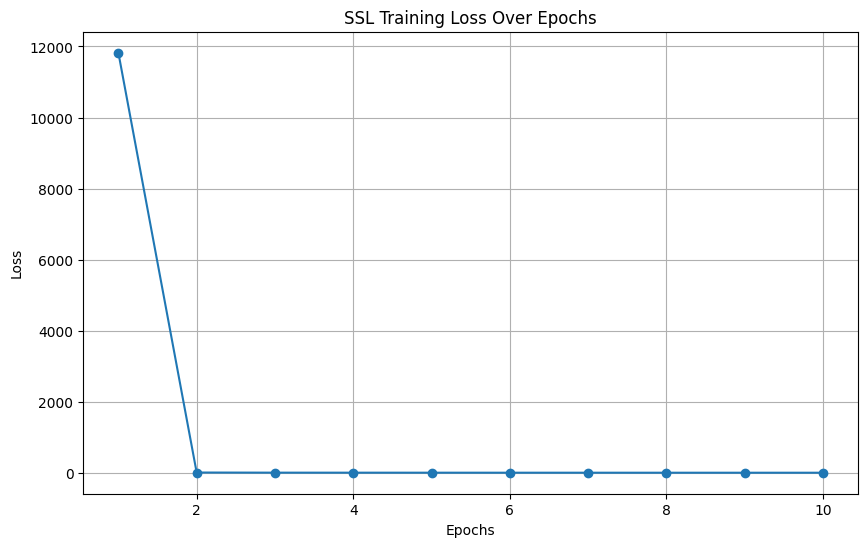

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
import torch.optim as optim
import matplotlib.pyplot as plt

class SSL_DINO(nn.Module):
    def __init__(self):
        super(SSL_DINO, self).__init__()
        self.backbone = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=0, img_size=244)

        # Add projection head for SSL
        self.projection = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Linear(512, 256)
        )

    def forward(self, x):
        features = self.backbone.forward_features(x)
        features = features[:, 1:, :]  # Remove CLS token

        B, N, C = features.shape
        H = W = int(N**0.5)
        features = features.permute(0, 2, 1).reshape(B, C, H, W)

        # Interpolate to (64, 64)
        features = F.interpolate(features, size=(64, 64), mode='bilinear', align_corners=False)

        # Global average pooling
        features = F.adaptive_avg_pool2d(features, (1, 1))
        features = features.view(B, -1)

        # Project features
        projected = self.projection(features)
        return features, projected

class DINOLoss(nn.Module):
    def __init__(self, temperature=0.5):
        super().__init__()
        self.temperature = temperature

    def forward(self, student_output, teacher_output):
        """
        Cross-entropy between softmax outputs of the teacher and student networks.
        """
        student_out = F.normalize(student_output, dim=-1, p=2)
        teacher_out = F.normalize(teacher_output, dim=-1, p=2)

        student_probs = F.softmax(student_out / self.temperature, dim=-1)
        teacher_probs = F.softmax(teacher_out / self.temperature, dim=-1)

        return -torch.sum(teacher_probs * torch.log(student_probs + 1e-6), dim=-1).mean()

def train_ssl(model, dataloader, optimizer, epochs=10):
    model.train()
    criterion = DINOLoss().cuda()
    loss_history = []

    for epoch in range(epochs):
        epoch_loss = 0
        for images, _ in dataloader:
            images = images.cuda()

            # Create two different augmented views
            batch_size = images.shape[0]
            idx_shuffle = torch.randperm(batch_size)

            # Get features and projections for both views
            features_1, proj_1 = model(images)
            features_2, proj_2 = model(images[idx_shuffle])

            # Calculate DINO loss between views
            loss = criterion(proj_1, proj_2.detach())  # Detach second view

            # Add regularization loss to encourage feature diversity
            features_correlation = torch.mm(features_1, features_1.t())
            reg_loss = torch.mean(torch.square(features_correlation - torch.eye(batch_size).cuda()))

            total_loss = loss + 0.1 * reg_loss

            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            epoch_loss += total_loss.item()

        avg_epoch_loss = epoch_loss / len(dataloader)
        loss_history.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

    # Plot loss graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs+1), loss_history, marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('SSL Training Loss Over Epochs')
    plt.grid()
    plt.show()

    return model

# Initialize the model and optimizer
ssl_model = SSL_DINO().cuda()
optimizer = optim.AdamW(ssl_model.parameters(), lr=3e-4, weight_decay=1e-4)

# Train the model
trained_model = train_ssl(ssl_model, train_loader, optimizer, epochs=10)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/10, Loss: 13.2011
Epoch 2/10, Loss: 0.5182
Epoch 3/10, Loss: 0.5105
Epoch 4/10, Loss: 0.1672
Epoch 5/10, Loss: 0.0854
Epoch 6/10, Loss: 0.0494
Epoch 7/10, Loss: 0.0321
Epoch 8/10, Loss: 0.0235
Epoch 9/10, Loss: 0.0184
Epoch 10/10, Loss: 0.0151


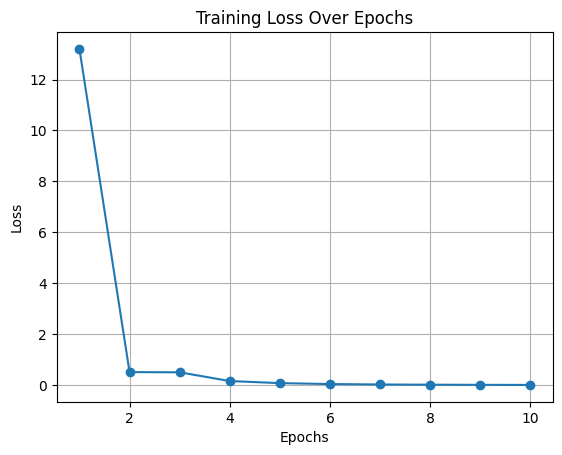

In [ ]:
import torch
import timm
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Load a ViT model pre-trained with DINO
class SSL_DINO(nn.Module):
    def __init__(self):
        super(SSL_DINO, self).__init__()
        self.backbone = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=0, img_size=244)  # Remove classifier

    def forward(self, x):
        features = self.backbone.forward_features(x)

        features = features[:, 1:, :]  # Shape: (batch, 225, 768)

        B, N, C = features.shape
        H = W = int(N**0.5)  # Compute height and width (15x15)
        features = features.permute(0, 2, 1).reshape(B, C, H, W)

        # Interpolate to (64, 64) for SAM compatibility
        features = torch.nn.functional.interpolate(features, size=(64, 64), mode='bilinear', align_corners=False)

        return features  # Now shape: (batch, 768, 64, 64)


# Initialize the SSL model
ssl_model = SSL_DINO().cuda()

# Training setup
optimizer = optim.AdamW(ssl_model.parameters(), lr=3e-4, weight_decay=1e-4)
criterion = nn.MSELoss()  # Example loss, adjust based on SSL strategy

# SSL Training loop (simplified)
def train_ssl(model, dataloader, optimizer, criterion, epochs=10):
    model.train()
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for images, _ in dataloader:
            images = images.cuda()
            optimizer.zero_grad()
            features = model(images)  # Extract embeddings
            loss = criterion(features, torch.zeros_like(features).cuda())  # Dummy loss for demonstration
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    # Plot loss graph
    plt.plot(range(1, epochs+1), loss_history, marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.grid()
    plt.show()
# Train SSL model
train_ssl(ssl_model, train_loader, optimizer, criterion, epochs=10)


In [10]:
from segment_anything import sam_model_registry

# Load SAM
sam = sam_model_registry["vit_b"](checkpoint="/content/sam_vit_b_01ec64.pth").cuda()
sam.to(device='cuda')
# Replace SAM's encoder with SSL-pretrained encoder
sam.image_encoder = ssl_model.backbone

# Set the img_size attribute manually
sam.image_encoder.img_size = 1024 # or whatever size is expected by SAM

# Freeze encoder layers (optional)
for param in sam.image_encoder.parameters():
    param.requires_grad = False

print("SSL-pretrained encoder integrated into SAM!")


/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


SSL-pretrained encoder integrated into SAM!


In [11]:
class ProjectionLayer(torch.nn.Module):
    def __init__(self, in_features=768, out_features=256 * 64 * 64):
        super(ProjectionLayer, self).__init__()
        self.projection = torch.nn.Linear(in_features, out_features)

    def forward(self, x):
        x = self.projection(x)  # [1, 768] -> [1, 256 * 64 * 64]
        x = x.view(1, 256, 64, 64)  # Reshape to [1, 256, 64, 64]
        return x


In [12]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

def train_sam(sam, dataloader, optimizer, epochs=5):
    sam.train()
    # Add a projection layer to transform the image embedding
    projection_layer = ProjectionLayer().cuda()
    # SAM expects images of size 1024x1024
    input_size = (244, 244)

    for epoch in range(epochs):
        epoch_loss = 0
        for batch_idx, (images, masks) in enumerate(dataloader):
            images, masks = images.cuda(), masks.cuda()
            optimizer.zero_grad()

            batch_loss = 0
            B = images.shape[0]  # Batch size

            # Process each image in the batch
            for i in range(B):
                # Get single image and mask
                image = images[i]  # Shape: [3, 244, 244]
                mask = masks[i]    # Shape: [1, 244, 244]

                # Resize image to SAM's expected size
                image_resized = F.interpolate(
                    image.unsqueeze(0),  # [1, 3, 244, 244]
                    size=input_size,
                    mode='bilinear',
                    align_corners=False
                )

                # Get image embedding
                with torch.no_grad():
                    image_embedding = sam.image_encoder(image_resized)

                # Project the image embedding to the expected shape
                image_embedding = projection_layer(image_embedding)  # Shape: [1, 256, 64, 64]
                # Generate prompt
                input_point = torch.tensor([[[input_size[0]//2, input_size[1]//2]]], device='cuda')
                input_label = torch.tensor([[1]], device='cuda')

                # Get sparse embeddings from prompt encoder
                sparse_embeddings, dense_embeddings = sam.prompt_encoder(
                    points=(input_point, input_label),
                    boxes=None,
                    masks=None
                )

                #print("Image Embedding Shape:", image_embedding.shape)  # Expected: (B, C, H, W)
                #print("Sparse Prompt Embeddings Shape:", sparse_embeddings.shape)  # Expected: (B, N, C)
                #print("Dense Prompt Embeddings Shape:", dense_embeddings.shape)  # Expected: (B, C, H, W)
                #print("Image PE Shape:", sam.prompt_encoder.get_dense_pe().shape)  # Should match image_embedding shape
                # Decode mask
                low_res_masks, iou_predictions = sam.mask_decoder(
                    image_embeddings=image_embedding,
                    image_pe=sam.prompt_encoder.get_dense_pe(),
                    sparse_prompt_embeddings=sparse_embeddings,
                    dense_prompt_embeddings=dense_embeddings,
                    multimask_output=False
                )

                # Resize predictions back to original size (244x244)
                masks_pred = F.interpolate(
                    low_res_masks,
                    size=(244, 244),
                    mode='bilinear',
                    align_corners=False
                )

                # Calculate loss
                loss = F.binary_cross_entropy_with_logits(masks_pred.squeeze(), mask.squeeze())
                batch_loss += loss

            # Average loss over batch
            batch_loss = batch_loss / B
            batch_loss.backward()
            optimizer.step()

            epoch_loss += batch_loss.item()

            if batch_idx % 10 == 0:
                print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {batch_loss.item():.4f}")

        avg_epoch_loss = epoch_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_epoch_loss:.4f}")

# Initialize optimizer
optimizer = optim.AdamW(sam.parameters(), lr=1e-4, weight_decay=1e-4)

# For debugging, let's print shapes first
for images, masks in train_loader:
    print("Images shape:", images.shape)
    print("Masks shape:", masks.shape)
    break

# Train the model
train_sam(sam, train_loader, optimizer, epochs=5)

Images shape: torch.Size([8, 3, 244, 244])
Masks shape: torch.Size([8, 1, 244, 244])
Epoch 1, Batch 0, Loss: 2.8313


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.00 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.47 GiB is free. Process 3982 has 13.27 GiB memory in use. Of the allocated memory 13.02 GiB is allocated by PyTorch, and 114.65 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)